In [25]:
# 在购物平台上选取某一商品评论进行爬虫，对爬取的文本做词频统计和词云展示，并基于snownlp库对商品评价做情感分析。

# 要求：
# 1.	爬虫至少包含10页的评论信息
# 2.	爬取的文本信息要求去除停用词，在停用词列表里可加上自定义内容
# 3.	显示情感各分数段出现频率柱状图和情感波动分析图并打印商品评价均值和中位数
# 4.	抽取自己学号最后一位数、最后第二位数、最后两位数（如，学号以39结束的同学使用第3条、第9条、第39条评论）对应的评论信息情感评分作为个例分析，查看评分是否准确
# 5.	每一步骤操作需要加上适当文字说明，或用注释写在程序里。如：
# 1 爬取了15页XX 商品的评论   代码及结果截屏: xxxx  
# 2 去除停用词   代码及结果截屏: xxxx
# 3词云展示    代码及结果截屏: xxxx
# 4我的学号为39  抽取第3/9/39条评价进行分析 代码及结果截屏: xxxx
# 结合以上案例，关于XX商品的评论情感分析准确度如何
# 6.	装订时需加上实验报告的封面，每一步操作截取相应代码结果即可，不要截显示器桌面整屏


In [26]:
import requests as re
import json

In [27]:
#设置浏览器标头
headers = {'User-Agent':'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.62',
           'Request Method':'Get',
           'callback':'fetchJSON_comment98'}

In [28]:
content= []
def crawler(url):    
    req=re.get(url ,timeout=50,headers=headers)  # 获取网页信息
    jd=json.loads(req.text.lstrip("fetchJSON_comment98vv375(").rstrip(");"))  #先把不用的内容去掉，再用json库解析
    for i in jd['comments']:
        content.append(i['content'])
for i in range(10):
    url="https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId=7784051&score=0&sortType=5&page={}&pageSize=10&isShadowSku=0&fold=1".format(i)
    crawler(url)

In [29]:
# 保存文件
f=open('jd.txt','w',encoding='utf-8')
f.writelines(content)
f.close()

In [30]:
import jieba
from snownlp import SnowNLP
import wordcloud 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# 导入停用词
stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]
# 在停用词列表里加上自定义内容
stopwords.append('\n')
stopwords.append(' ')
stopwords.append('，')
stopwords.append('。')
stopwords.append('！')
stopwords.append('？')
stopwords.append('、')
stopwords.append('：')
stopwords.append('“')
stopwords.append('”')
stopwords

['一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一起',
 '一转眼',
 '一边',
 '一面',
 '七',
 '万一',
 '三',
 '三天两头',
 '三番两次',
 '三番五次',
 '上',
 '上下',
 '上升',
 '上去',
 '上来',
 '上述',
 '上面',
 '下',
 '下列',
 '下去',
 '下来',
 '下面',
 '不',
 '不一',
 '不下',
 '不久',
 '不了',
 '不亦乐乎',
 '不仅',
 '不仅...而且',
 '不仅仅',
 '不仅仅是',
 '不会',
 '不但',
 '不但...而且',
 '不光',
 '不免',
 '不再',
 '不力',
 '不单',
 '不变',
 '不只',
 '不可',
 '不可开交',
 '不可抗拒',
 '不同',
 '不外',
 '不外乎',
 '不够',
 '不大',
 '不如',
 '不妨',
 '不定',
 '不对',
 '不少',
 '不尽',
 '不尽然',
 '不巧',
 '不已',
 '不常',
 '不得',
 '不得不',
 '不得了',
 '不得已',
 '不必',
 '不怎么',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不择手段',
 '不敢',
 '不料',
 '不断',
 '不日',
 '不时',
 '不是',
 '不曾',
 '不止',
 '不止一次',
 '不比',
 '不消',
 '不满',
 '不然',
 '不然的话',
 '不特',
 '不独',
 '不由得',
 '不知不觉',
 '不管',
 '不管怎样',
 '不经意',
 '不胜',
 '不能',
 '不能不',
 '不至于',
 '不若',
 '不要',
 '不论',
 '不起',
 '不足',
 '不过',
 '不迭',
 '不问',
 '不限',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '专门',
 '且',
 '且不说',
 '且

In [32]:
# 打开文件
text = open('jd.txt', 'r', encoding='utf-8').read()
text

'无线鼠标真心好，没有了线的烦恼，移动不受限制。\n罗技品牌很实在，性价比很高，鼠标轻巧，定位准确，手感舒适。\n连接很稳定，没有什么延迟的感觉，。\n我用来竞技游戏比502强，没有编程不影响。轻便好用，反应敏捷，特别是点击区比较大，按起来舒服。前后的快捷键也比较清脆。体积和重量比旁边的m720好很多，因为体积小、重量轻，所以快速点击和操作反应快，打游戏比办公更适合，特别是手比较大的。原来用g502的俗称手臂锻炼健身器，由于桌上线和东西太多影响玩吃鸡，鼠标拖来拖去老容易勾到线，乘这次618活动搞了个无线鼠标，瞬间清爽了，反正都是hero芯片，1毫秒响应，1000的回报率，性价比很高。怕接受芯片放在机器上影响接受，还送了个usb延长线。紫色很好看，金克丝真棒！我手19cm抓握和指握都很舒服，鼠标轻盈久玩不累，配上7号锂电池加5号转换筒鼠标重心得以居中，玩CF拉*得心应手，助我排位乱杀哈哈这个鼠标有点点大，适合中大手。网上测评很多我就不说了。说说使用感觉吧。左右按键手感不错。滚轮的切换很方便，无阻泥模式很顺滑，可以滑好久好久。宏功能软件功能很强大。我设置了复制剪切粘贴前进后退。特别好用。目前使用鼠标的手感不错，尤其是侧键非常好用，已经改成了复制粘贴，很方便，下载罗技的软件后可以使用游戏模式，不掉帧，现在使用的续航模式，感觉也不错，够用了鼠标很不错，rgb很漂亮，性能优！左右手都合适！而且链接稳定！主要续航爆棚。基本一个月以上都不需要管！大品牌又是！差不多适用任何场景！便携度：第一次用自己买的无线鼠标，很喜欢，收纳槽也蛮喜欢的！\n响应速度：看了很多评测，知道这个很厉害，上手了没发现与有线的区别，我不咋玩射击游戏。\n外观颜值：很喜欢成熟的设计，低调而且有内涵。以前买过蝰蛇2013，那个也很喜欢，这个也很好，感觉适合成熟一点的我。握感和大小贴合，还是更喜欢蝰蛇的外形轮廓，捏着更爆满和舒服，这个有一说一。但是2013双击太严重了，修了几次非常失望，自己那会手艺太差，换樱桃黑点换得也不好，太菜了，现在让我弄绝对完美解决。\n耐用度：蝰蛇后面就用了个G100那样的小鼠标，非常喜欢，很耐用和靠谱，后来了解罗技的口碑，觉得舍得买蝰蛇不如买个这样的级别的，不信任蝰蛇了，微动很廉价。这个没有标微动开关次数寿命，那个兄弟产品好像是502标的5000万次，这个不写应该没那么高。我等使用结果

In [33]:
textWord=jieba.lcut(text)
textWord

['无线',
 '鼠标',
 '真心',
 '好',
 '，',
 '没有',
 '了',
 '线',
 '的',
 '烦恼',
 '，',
 '移动',
 '不',
 '受限制',
 '。',
 '\n',
 '罗技',
 '品牌',
 '很',
 '实在',
 '，',
 '性价比',
 '很',
 '高',
 '，',
 '鼠标',
 '轻巧',
 '，',
 '定位',
 '准确',
 '，',
 '手感',
 '舒适',
 '。',
 '\n',
 '连接',
 '很',
 '稳定',
 '，',
 '没有',
 '什么',
 '延迟',
 '的',
 '感觉',
 '，',
 '。',
 '\n',
 '我',
 '用来',
 '竞技',
 '游戏',
 '比',
 '502',
 '强',
 '，',
 '没有',
 '编程',
 '不',
 '影响',
 '。',
 '轻便',
 '好用',
 '，',
 '反应',
 '敏捷',
 '，',
 '特别',
 '是',
 '点击',
 '区',
 '比较',
 '大',
 '，',
 '按',
 '起来',
 '舒服',
 '。',
 '前后',
 '的',
 '快捷键',
 '也',
 '比较',
 '清脆',
 '。',
 '体积',
 '和',
 '重量',
 '比',
 '旁边',
 '的',
 'm720',
 '好',
 '很多',
 '，',
 '因为',
 '体积小',
 '、',
 '重量轻',
 '，',
 '所以',
 '快速',
 '点击',
 '和',
 '操作',
 '反应',
 '快',
 '，',
 '打游戏',
 '比',
 '办公',
 '更',
 '适合',
 '，',
 '特别',
 '是',
 '手',
 '比较',
 '大',
 '的',
 '。',
 '原来',
 '用',
 'g502',
 '的',
 '俗称',
 '手臂',
 '锻炼',
 '健身器',
 '，',
 '由于',
 '桌上',
 '线',
 '和',
 '东西',
 '太',
 '多',
 '影响',
 '玩',
 '吃',
 '鸡',
 '，',
 '鼠标',
 '拖来拖去',
 '老',
 '容易',
 '勾到',
 '线',
 '，',
 '乘',
 '这次',
 '618',

In [34]:
# 去除停用词
textWord = [word for word in textWord if not word in stopwords] 

In [35]:
# 创建一个字典，进行词频统计
wordCounts = {}
for word in textWord:
    if word in wordCounts:
        wordCounts[word] += 1
    else:
        wordCounts[word] = 1

In [36]:
# 词频统计结果转换成列表
item = list(wordCounts.items())
# 对词频进行排序
item.sort(key=lambda x:x[1], reverse=True)
item

[('鼠标', 109),
 ('外观', 43),
 ('罗技', 42),
 ('颜值', 40),
 ('手感', 37),
 ('便携', 34),
 ('响应速度', 34),
 ('买', 32),
 ('不错', 31),
 ('度', 29),
 ('无线', 28),
 ('舒适度', 28),
 ('喜欢', 27),
 ('耐用度', 27),
 ('高', 23),
 ('舒服', 23),
 ('按键', 22),
 ('适合', 21),
 ('手', 20),
 ('办公', 19),
 ('特色', 19),
 ('游戏', 16),
 ('电池', 16),
 ('好用', 15),
 ('延迟', 14),
 ('感觉', 13),
 ('真的', 13),
 ('舒适', 12),
 ('特别', 12),
 ('很快', 12),
 ('很棒', 12),
 ('性价比', 11),
 ('打游戏', 11),
 ('活动', 11),
 ('合适', 11),
 ('京东', 11),
 ('棒', 11),
 ('品牌', 10),
 ('有线', 10),
 ('大小', 10),
 ('耐用', 10),
 ('白色', 10),
 ('价格', 10),
 ('说', 9),
 ('携带', 9),
 ('重量', 8),
 ('续航', 8),
 ('蝰蛇', 8),
 ('一点', 8),
 ('换', 8),
 ('满意', 8),
 ('这款', 8),
 ('购买', 8),
 ('体验', 8),
 ('质量', 8),
 ('值得', 8),
 ('线', 7),
 ('清脆', 7),
 ('好看', 7),
 ('滚轮', 7),
 ('G304', 7),
 ('配重', 7),
 ('轻', 7),
 ('超级', 7),
 ('推荐', 7),
 ('黑色', 7),
 ('感', 7),
 ('速度', 7),
 ('定位', 6),
 ('稳定', 6),
 ('502', 6),
 ('太', 6),
 ('玩', 6),
 ('响应', 6),
 ('5', 6),
 ('功能', 6),
 ('软件', 6),
 ('小巧', 6),
 ('小手', 6),
 ('支持', 6),


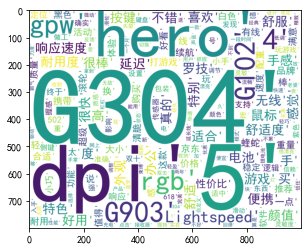

In [37]:
# 词云展示
w = wordcloud.WordCloud(
    font_path='simhei.ttf',
    background_color='white',
    width=1000,
    height=800
).generate(str(item))
plt.imshow(w)


In [38]:
# 进行情感分析
# 首先将text数据转换成列表
textList = text.split('\n')
# 删除空行
textList = [i for i in textList if i != '']
# 将列表转换成dataframe
textDf = pd.DataFrame(textList, columns=['text'])
textDf

,text
0,无线鼠标真心好，没有了线的烦恼，移动不受限制。
1,罗技品牌很实在，性价比很高，鼠标轻巧，定位准确，手感舒适。
2,连接很稳定，没有什么延迟的感觉，。
3,我用来竞技游戏比502强，没有编程不影响。轻便好用，反应敏捷，特别是点击区比较大，按起来舒服...
4,响应速度：看了很多评测，知道这个很厉害，上手了没发现与有线的区别，我不咋玩射击游戏。
...,...
150,最后就是看它能用多长时间了，我上一个用了七八年，希望这个可以用的久一点。耐用度：非常棒，有两...
151,响应速度：传感器很棒，延迟很小。
152,便携度：可以插线，也可以无限，大小也很合适。
153,外观颜值：很漂亮，很喜欢，质感很棒。


In [39]:
# 对每一条评论进行情感分析
sentiments=[]
for i in textList:
    s = SnowNLP(str(i))
    sentiments.append(s.sentiments)
textDf['sentiments']=sentiments
textDf

,text,sentiments
0,无线鼠标真心好，没有了线的烦恼，移动不受限制。,0.698026
1,罗技品牌很实在，性价比很高，鼠标轻巧，定位准确，手感舒适。,0.999998
2,连接很稳定，没有什么延迟的感觉，。,0.750717
3,我用来竞技游戏比502强，没有编程不影响。轻便好用，反应敏捷，特别是点击区比较大，按起来舒服...,1.000000
4,响应速度：看了很多评测，知道这个很厉害，上手了没发现与有线的区别，我不咋玩射击游戏。,0.987561
...,...,...
150,最后就是看它能用多长时间了，我上一个用了七八年，希望这个可以用的久一点。耐用度：非常棒，有两...,0.996331
151,响应速度：传感器很棒，延迟很小。,0.886490
152,便携度：可以插线，也可以无限，大小也很合适。,0.989350
153,外观颜值：很漂亮，很喜欢，质感很棒。,0.999894


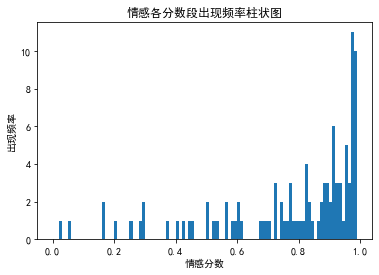

In [40]:
# 显示情感各分数段出现频率柱状图
plt.hist(textDf['sentiments'], bins=np.arange(0, 1, 0.01))
# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel('情感分数')
plt.ylabel('出现频率')
plt.title('情感各分数段出现频率柱状图')
plt.show()


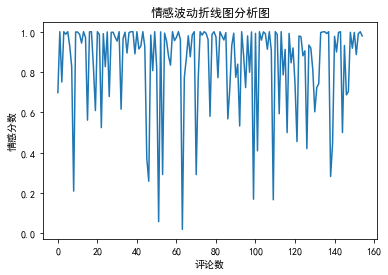

In [41]:
# 显示情感波动折线图分析图
plt.plot(textDf['sentiments'])
plt.xlabel('评论数')
plt.ylabel('情感分数')
plt.title('情感波动折线图分析图')
plt.show()

In [42]:
# 打印商品评价均值和中位数
print('商品评价均值：',textDf['sentiments'].mean())
print('商品评价中位数：',textDf['sentiments'].median())

商品评价均值： 0.8469264416379197
商品评价中位数： 0.9582087870266326


In [43]:
# 抽取自己学号最后一位数、
# 最后第二位数、
# 最后两位数对应的评论信息情感评分作为个例分析，查看评分是否准确
# 学号7055，最后一位数5，最后第二位数0，最后两位数55
print('最后一位数5的评论情感评分：',textDf['sentiments'][4])
print('最后第二位数5的评论情感评分：',textDf['sentiments'][4])
print('最后两位数55的评论情感评分：',textDf['sentiments'][54])

最后一位数5的评论情感评分： 0.9875612794289
最后第二位数5的评论情感评分： 0.9875612794289
最后两位数55的评论情感评分： 0.9927456925832603
